# Recesiones en México

Arthur Burns y Wesley Michell en 1946 en su libro "Measuring Bussiness Cycles" definen al ciclo económico como:

"…*las fluctuaciones en la actividad agregada de un país que se encuentra organizada en empresas de negocios*…"

**El ciclo económico clásico se caracteriza por tres fases principales:** 

I.	**Recesión**: es la etapa donde la actividad económica comienza a disminuir y termina cuando la actividad económica alcanza su punto más bajo. 

II.	**Recuperación**: comienza cuando la actividad económica comienza a crecer despues de una recesión y termina cuando la actividad alcanza el nivel del pico donde comenzó la recesión.

III. **Expansión**: Es cuando la actividad económica se está expandiendo y supera el nivel del pico de la recesión.


Un ciclo económico clásico se vería de la siguiente manera

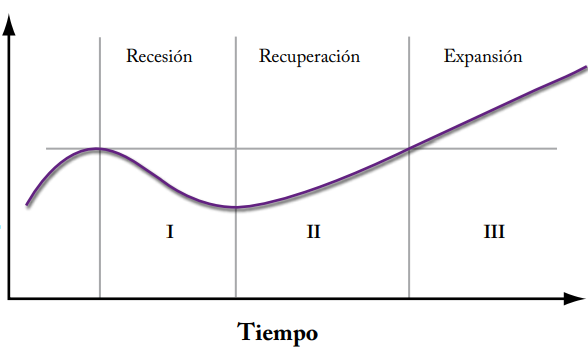

Fuente: Jonathan Heath (2012), Lo que indican los indicadores. Cómo utilizar la información estadística para entender la realidad económica de México. INEGI. versión electrónica: https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825003406

De acuerdo con el Cómite de Fechado de Ciclos de la Economía de México, han ocurrido las siguientes recesiones desde 1980 hasta la actualidad.

| | Recesión  | Fecha inicio    | Fecha Fin   | Duración   |
|---:|:-------------|:-----------|:------|:------|
| 1 | Crisis del 82 | Dic-1981       | Jun-1983   | 19 meses     |
| 2 | Crisis del 86  | Oct-1985    | Dic-1986   | 15 meses     |
| 3 | Crisis del 94  | Dic-1994    | May-1995   | 6 meses     |
| 4 | Crisis del 01  | Oct-2000    | Ene-2002   | 16 meses     |
| 5 | Crisis del 08  | Jul-2008    | May-2009   | 11 meses     |
| 6 | Crisis del Covid | Jun-2019    | May-2020   | 12 meses     |

Por lo tanto en esta notebook se analizara el último ciclo económico de la economía mexicana. Pero antes de nuestro análisis graficaremos y veremos los ciclos de la economía mexicana y la evolución del PIB trimestral desestacionalizado.

**Antes que nada importamos las librerías básicas**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

primero importamos los datos de los archivos que se adjuntan en esta tarea

In [26]:
## los datos mensuales de las recesiones
datos_rec = pd.read_excel('recesionmex.xlsx')

## los datos del PIB de México
pib_trim=pd.read_excel('pib_trim.xlsx')

asegurarse que las fechas sean fechas

In [27]:
## convertimos en fechas los datos de recesión
datos_rec['fecha']=pd.to_datetime(datos_rec['fecha'])
# convertimos en fechas los datos del PIB
pib_trim.fecha=pd.PeriodIndex(pib_trim.fecha, freq='Q')

In [28]:
#creamos un duplicado de los datos de recesión
datos_rec2=datos_rec.copy()

## recesiones es un 1, así que multiplicamos para que las areas gris lleguen cubra los limites del eje Y
datos_rec2['recesion']=datos_rec2['recesion']*pib_trim['PIB'].max()*1.1


In [29]:
pib_trim.head()


,fecha,PIB
0,1980Q1,7.477954e+06
1,1980Q2,7.501150e+06
2,1980Q3,7.677707e+06
3,1980Q4,7.913464e+06
4,1981Q1,8.155986e+06


**Graficamos y sombreamos las recesiones**

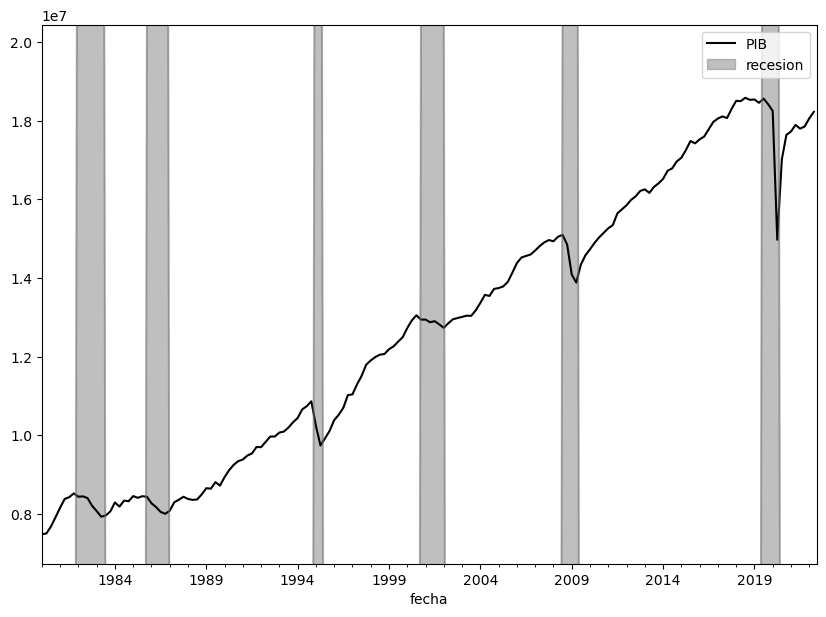

In [30]:
fig1, ax = plt.subplots()
pib_trim.plot.line(ax=ax, figsize=(10, 7), y='PIB', x='fecha', color="black")
datos_rec2.plot.area(ax=ax, figsize=(10, 7), x='fecha', alpha=0.5, color="gray")
plt.ylim(pib_trim['PIB'].min()*0.9, pib_trim['PIB'].max()*1.1)
plt.show()

**Graficamos la última recesión de México**

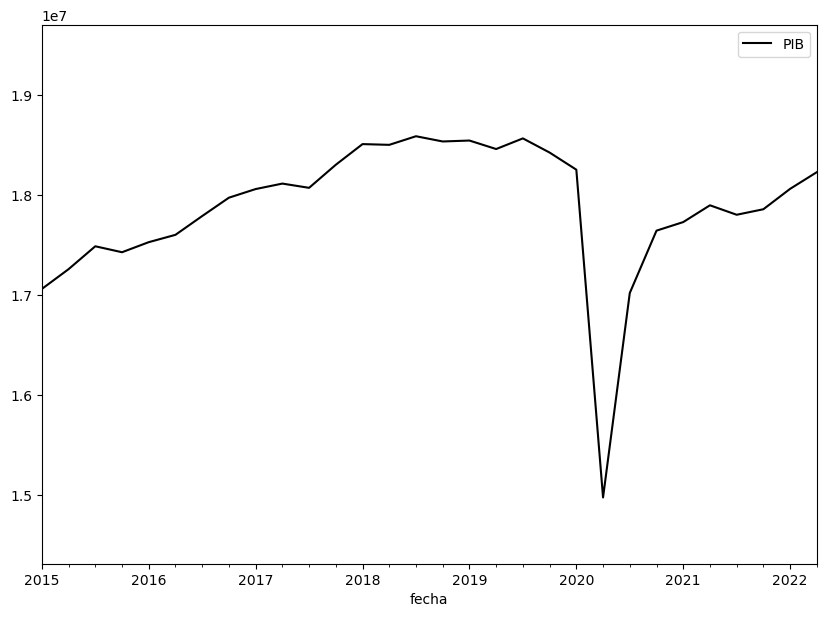

In [31]:
fig1, ax = plt.subplots()
pib_trim.plot.line(ax=ax, figsize=(10, 7), y='PIB', x='fecha', color="black")
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim('2015-01-01', '2022-06-01')
plt.show()

como podras notar aun no se recupera el nivel del PIB que México tenia previo a la pandemia, la pregunta es **¿cuándo recuperara México el PIB previo de la recesión de la Pandemia?**

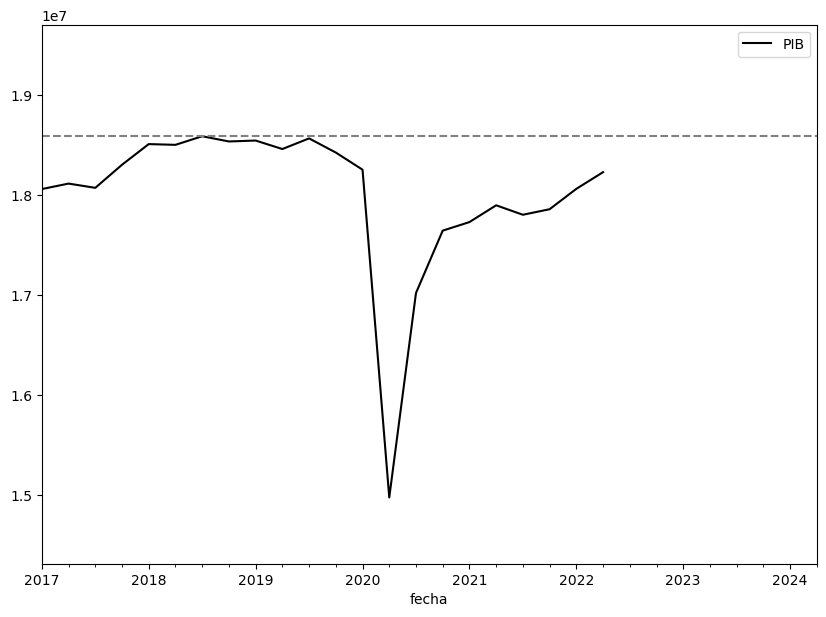

In [32]:
fig1, ax = plt.subplots()
pib_trim.plot.line(ax=ax, figsize=(10, 7), y='PIB', x='fecha', color="black")
ax.axhline(y=pib_trim['PIB'].max(), color="gray", linestyle='--')
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim('2017-01-01', '2024-06-01')
plt.show()

Así que tu trabajo sera hacer un pronóstico de cuantos trimestres mas le tomará a la economía recuperar su nivel prepandemia y si esa recuperación ocurrirá al final del sexenio

Realiza lo siguiente:
1. Prueba de raíz unitaria para verificar que el PIB sea una serie estacionaria
2. En caso de que no lo sea diferencia el PIB y guardalo en un objeto llamado pib_diff
3. Realiza la prueba de raíz unitaria y verifica que la primera diferencia del PIB sea estacionario
4. Una vez que el PIB sea estacionario  realiza las gráficas de ACF y PACF para tratar de identificar el proceso, y plantea por lo menos tres procesos (solo plantearlos, no estimarlos)
5. Con base en la notebook "pronostico_arima" utiliza la función "*if*" para probar hasta un arma(6,6) de la series pib_diff
6. Si naciste en enero-junio utiliza el criterio bayesiano de información (BIC) para seleccionar el modelo, si naciste julio-diciembre utiliza el criterio de Akaike (AIC).


In [33]:
# las librerias de series de tiempo:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA

In [34]:
# 1-Verificar si este es un proceso estacionario
# hacemos la prueba de dickey-fuller (raíz unitaria)
ADF_test = adfuller(pib_trim['PIB'])
#H0: la serie es NO ESTACIONARIA

#Significancia 0.05
alpha = 0.05
if ADF_test[1] < alpha:
    print('Se rechaza H0, la serie es estacionaria')
else:
    print('No se rechaza H0, la serie es NO estacionaria')

No se rechaza H0, la serie es NO estacionaria


In [35]:
#2-No es estacionaria, por lo que la diferenciaremos en una nueva variable
pib_diff= pib_trim
pib_diff['PIB_diferenciado'] = pib_trim['PIB'].diff()

In [37]:
pib_diff.head()

,fecha,PIB,PIB_diferenciado
0,1980Q1,7.477954e+06,NaN
1,1980Q2,7.501150e+06,23196.019979
2,1980Q3,7.677707e+06,176556.367223
3,1980Q4,7.913464e+06,235757.117109
4,1981Q1,8.155986e+06,242521.879502


In [36]:
# 3-Verificar si este es un proceso estacionario
# hacemos la prueba de dickey-fuller (raíz unitaria)
ADF_test1 = adfuller(pib_diff['PIB_diferenciado'].dropna())
#H0: la serie es NO ESTACIONARIA

#Significancia 0.05
alpha = 0.05
if ADF_test1[1] < alpha:
    print('Se rechaza H0, la serie es estacionaria')
else:
    print('No se rechaza H0, la serie es NO estacionaria')

Se rechaza H0, la serie es estacionaria


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


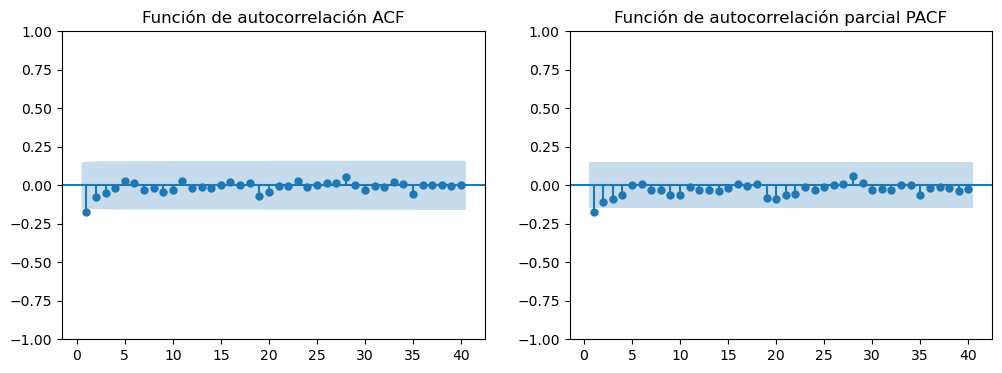

In [38]:
## 4. identificar que tipo de proceso estacionario es
fig, ax =plt.subplots(1,2, figsize =(12,4))
## subgrafica 0
plot_acf(pib_diff['PIB_diferenciado'].dropna(), zero=False, lags=40, ax=ax[0], title= 'Función de autocorrelación ACF')
ax[0].set_ylim(-1,1)
## subgrafica 1
plot_pacf(pib_diff['PIB_diferenciado'].dropna(), zero=False, lags=40, ax=ax[1], title= 'Función de autocorrelación parcial PACF')
ax[1].set_ylim(-1,1)
plt.show()

**Dadas las graficas de autocorrelación y autocorrelación parcial, podemos proponer que el PIB sigue los siguientes tres procesos:**
1. Media Movil
2. AR()
3. ARMA()

In [55]:
#6.-Vamos a estimar varios modelos y que se guarde el AIC BIC

ic = {}
for ar in range(6):
    for ma in range(6):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(pib_trim['PIB'], order=(ar,1,ma))
        resultado = modelo.fit()
        ic[(ar,ma)] = [resultado.aic, resultado.bic]
        
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 3


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 4


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 5


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 2


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 3


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 4


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 5


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 3


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 4


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 5


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 3


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 4


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


C:\Users\sudaf\Documentos\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [65]:
#Nací en diciembre, usare AIC
ic.sort_values('AIC', ascending=True).head(3) 

,,AIC,BIC
AR,MA,,
2,1,4788.006331,4800.525926
1,2,4788.113880,4800.633475
0,0,4788.521670,4791.651569


**Según el AIC el mejor modelo es un ARIMA (2,1,1)**

**los siguientes códigos son para ayudarte a estimar tu modelo**

In [17]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults


In [9]:
#ejecuta el siguiente modelo definiendo el orden ARIMA (p,I,q) que sugieren los pasos anteriores
# yo aleatoriamente elegi un arima(1,1,1)
p=1
I=1
q=1 

model = ARIMA(pib_trim['PIB'],order=(p,I,q))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    PIB   No. Observations:                  170
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2392.902
Date:                Tue, 09 May 2023   AIC                           4791.803
Time:                        16:34:39   BIC                           4801.193
Sample:                             0   HQIC                          4795.614
                                - 170                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1149      1.307     -0.088      0.930      -2.676       2.446
ma.L1          0.0820      1.308      0.063      0.950      -2.482       2.646
sigma2      1.159e+11   1.35e-10   8.58e+20      0.0

In [59]:
pib_trim.head()

,fecha,PIB,PIB_diferenciado
0,1980Q1,7.477954e+06,NaN
1,1980Q2,7.501150e+06,23196.019979
2,1980Q3,7.677707e+06,176556.367223
3,1980Q4,7.913464e+06,235757.117109
4,1981Q1,8.155986e+06,242521.879502


In [60]:
## el modelo a estimar de el PIB es un ARIMA(2,1,1)
modelo = ARIMA(pib_trim['PIB'], order=(2,1,1))
resultado = modelo.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                    PIB   No. Observations:                  170
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2390.003
Date:                Wed, 10 May 2023   AIC                           4788.006
Time:                        13:42:37   BIC                           4800.526
Sample:                             0   HQIC                          4793.087
                                - 170                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9516      0.032     29.520      0.000       0.888       1.015
ar.L2          0.0483      0.027      1.808      0.071      -0.004       0.101
ma.L1         -0.9987      0.045    -22.084      0.0

In [58]:
## nota que la serie de tiempo el primer trimestre de 1980 es 0, 
## y el segundo trimestre de 2022 es 169
pib_trim

,fecha,PIB,PIB_diferenciado
0,1980Q1,7.477954e+06,NaN
1,1980Q2,7.501150e+06,23196.019979
2,1980Q3,7.677707e+06,176556.367223
3,1980Q4,7.913464e+06,235757.117109
4,1981Q1,8.155986e+06,242521.879502
...,...,...,...
165,2021Q2,1.789327e+07,167830.277268
166,2021Q3,1.779862e+07,-94646.967531
167,2021Q4,1.785390e+07,55276.784448
168,2022Q1,1.805777e+07,203875.598971


por tanto nosotros queremos graficar el tercer trimestre de 2022 (170), el cuarto trimestre de 2022 (171), etc.

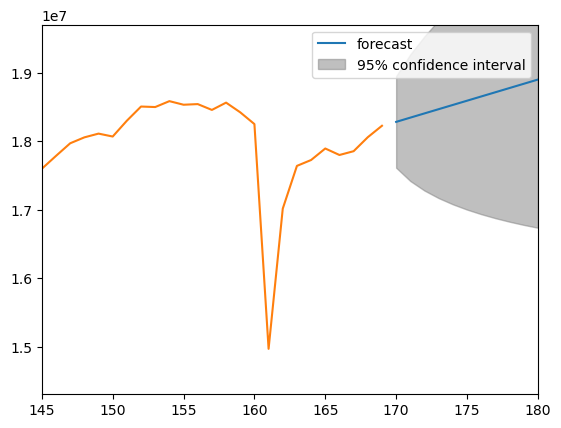

In [61]:
# graficamente esto es lo que buscamos
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(resultado, start=170,end=180)
plt.plot(pib_trim['PIB'])
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim(145,180)
plt.show()


In [62]:
## el valor máximo lo podemos buscar de forma sencilla con 
pib_trim['PIB'].max()

18583728.7115077

pronosticamos dos años

In [63]:
resultado.predict(170, 180)

170    1.828131e+07
171    1.834325e+07
172    1.840492e+07
173    1.846660e+07
174    1.852828e+07
175    1.858995e+07
176    1.865161e+07
177    1.871326e+07
178    1.877492e+07
179    1.883656e+07
180    1.889820e+07
Name: predicted_mean, dtype: float64

Notamos que el valor maximo del PIB antes del covid fue de **18,583,728.71**, y según los pronósticos, este valor se alcanzará en el trimestre número **175.**

Recordando que el trimestre 169 es el segun trimestre del 2022, el trimestre 175 equivale al **último trimestre del 2023** que es cuando el PIB superará su valor más alto pre-pandemia, y respondiendo a si será antes de acabar el sexenio, la respuesta es que si, ya que el sexenio de AMLO acabará hasta aproximadamente octubre del 2024